<a href="https://colab.research.google.com/github/choiboy92/ImperialML/blob/main/Tutorial%202/Tutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prior, posterior and likelihood calculation

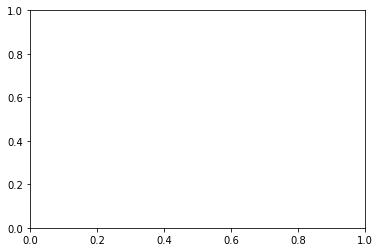

In [5]:
# Import packages
import numpy as np
np.random.seed(5)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

In [6]:
# define a function to generate the Gaussian shape (normal distribution)
def Gaussian(x, mu, sig):
  out = (1/(sig*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-mu)/sig)**2)
  return out

# Example run
print(Gaussian(1,0,0.5))

0.10798193302637613


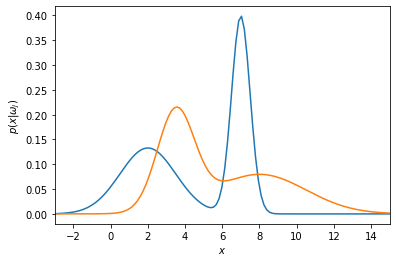

In [19]:
x = np.linspace(-10,20,200)

# Create distributions for the likelihood --> P(x|w_j)
p_state1 = Gaussian(x, 2, 1.5) + Gaussian(x, 7, 0.5)
p_state1 /= np.trapz(p_state1, x)   #scale so integral is 1
p_state2 = Gaussian(x, 8, 2.5) + Gaussian(x, 3.5, 1)
p_state2 /= np.trapz(p_state2, x)   #scale so integral is 1
plt.plot(x,p_state1)
plt.plot(x,p_state2)
plt.xlim(-3,15)
plt.ylabel(r'$p(x|\omega_j)$')
plt.xlabel(r'$x$')
plt.show()

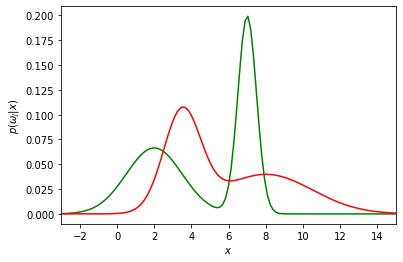

In [21]:
# Define priors --> p(w_j)
prior_1 = 0.5
prior_2 = 0.5

# Calculate posteriors --> p(w_j|x)
posterior1 = (p_state1*prior_1)
posterior2 = (p_state2*prior_2)
plt.xlim(-3,15)

# plot likelihoods
#plt.plot(x, p_state1)   #blue
#plt.plot(x, p_state2)   #orange

# N.B. evidence, p(x), just acts as a scaling term
# when comparing posteriors, p(x) is not necessary
plt.plot(x, posterior1, color="green")
plt.plot(x, posterior2, color="red")
plt.ylabel(r'$p(\omega_j|x)$')
plt.xlabel(r'$x$')
plt.show()

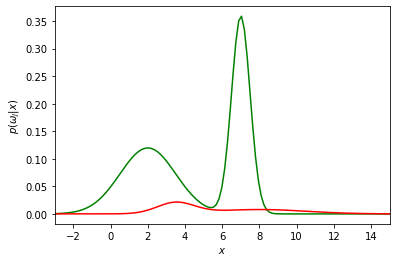

In [20]:
# Define priors --> p(w_j)
prior_2 = 0.1
prior_1 = 0.9

# Calculate posteriors --> p(w_j|x)
posterior1 = (p_state1*prior_1)
posterior2 = (p_state2*prior_2)
plt.xlim(-3,15)

# plot likelihoods
#plt.plot(x, p_state1)   #blue
#plt.plot(x, p_state2)   #orange

# N.B. evidence, p(x), just acts as a scaling term
# when comparing posteriors, p(x) is not necessary
plt.plot(x, posterior1, color="green")
plt.plot(x, posterior2, color="red")
plt.ylabel(r'$p(\omega_j|x)$')
plt.xlabel(r'$x$')
plt.show()

## Classification with Bayes

In [2]:
import numpy as np
np.random.seed(5)
from sklearn import datasets
ds = datasets.make_classification(1000,n_features=2,n_informative=2,n_redundant=0)
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(ds[0],ds[1], test_size=0.33)

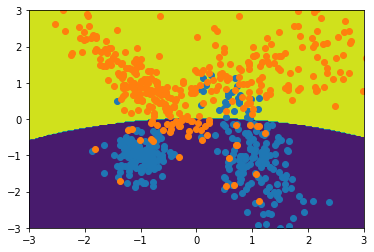

In [3]:
from sklearn.naive_bayes import GaussianNB

# fit Normal distribution to the training data
# i.e. be able to describe the distribution of points in x_train (the likelihood)
clf = GaussianNB()
clf.fit(x_train, y_train)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()


# function for generating the meshgrid for plots
def gen_sample_grid(npx = 200, npy = 200, limit =1):
  x1line = np.linspace(-limit,limit, npx)
  x2line = np.linspace(-limit,limit, npy)

  x1grid, x2grid = np.meshgrid(x1line, x2line)

  # produce an grid array with all grid values
  xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T

  return xgrid, x1line, x2line


Xgrid, X1line, X2line = gen_sample_grid(npx=200, npy=200, limit = 3)

# based on features domain, predict the classification
classVals = clf.predict(Xgrid)
classVals = np.reshape(classVals, [200,200])
plt.contourf(X1line, X2line, classVals) # plot contour

# PLOT TRAINING DATA POINTS
# feature 1 vs feature 2, for class y=0
ax.scatter(x_train[y_train==0,0], x_train[y_train==0,1])
# feature 1 vs feature 2, for class y=1
ax.scatter(x_train[y_train==1,0], x_train[y_train==1,1])
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

In [4]:
# Evaluate the performance of the algorithm
y_test_model = clf.predict(x_test)
nTot = len(y_test) 
nMatch = 0 
for i in range(len(y_test)):
	if y_test[i] == y_test_model[i]:
		nMatch += 1

print("Accuracy: ", 100 * nMatch / nTot, "%")

Accuracy:  91.21212121212122 %


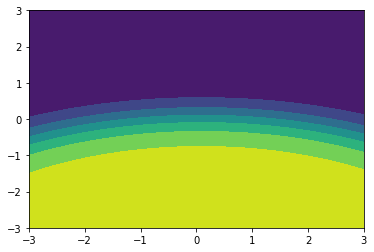

In [ ]:
# Plot the posterior probabilities with each classification
# i.e. probability of classifying as a certain state, given the input features
probVals = clf.predict_proba(Xgrid)
probGrid = np.reshape(probVals[:, 0], [200, 200])
plt.contourf(X1line, X2line, probGrid)
plt.show()